In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Loading the Dataset
dataset = pd.read_csv("diet.csv")

#Dropping features with nul values
dataset = dataset.drop(['SEQN','DRQSDT1', 'DRQSDT2', 'DRQSDT3','DRQSDT4','DRQSDT5','DRQSDT6',
      'DRQSDT7','DRQSDT8','DRQSDT9','DRQSDT10','DRQSDT11','DRQSDT12',
       'DRQSDT91','DRD370TQ', 'DRD370UQ','DRD370SQ','DRD370RQ','DRD370QQ',
       'DR1SKY','DR1TATOA','DR1TB12A','DR1TTHEO','DR1TALCO','DR1TP184',
       'DR1.320Z','DR1.330Z','DR1BWATZ','DRD350A','DRD350AQ','DRD350B',
       'DRD350BQ','DRD350F','DRD350FQ','DRD350G','DRD350GQ','DRD350H',
       'DRD350HQ','DRD350I','DRD350IQ','DRD350J','DRD350JQ','DRD350K',
       'DRD370A','DRD370AQ','DRD370B','DRD370BQ','DRD370C','DRD370CQ',
       'DRD370D','DRD370DQ','DRD370E','DRD370EQ','DRD370F','DRD370FQ',
       'DRD370G','DRD370GQ','DRD370H','DRD370HQ','DRD370I','DRD370IQ',
       'DRD370J','DRD370JQ','DRD370K','DRD370JQ','DRD370L','DRD370LQ',
       'DRD370M','DRD370MQ','DRD370N','DRD370NQ','DRD370O','DRD370OQ',
       'DRD370P','DRD370PQ','DRD370Q','DRD370R','DRD370S','DRD370T',
       'DRD370U','DRD370V','DRD370KQ','DRD350EQ','DRD350E','DRD350DQ',
       'DRD350D','DRD350CQ','DRD350C','DBD100','DRD340','DRD360','WTDR2D'], axis = 1)

In [4]:
#Cleaning the data
dataset.sort_values(by ='WTDRD1', ascending=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.drop(dataset.index[0:1152], inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.interpolate(method='linear', limit_direction='both', axis = 1, inplace=True)

In [5]:
#Checking missing data
missing_data = dataset.isnull().sum()

In [9]:
#Scalling the Dataset
normalized_df=(dataset-dataset.min())/(dataset.max()-dataset.min())
print(normalized_df)

            WTDRD1  DR1DRSTZ  DR1EXMER  DRABF  DRDINT   DR1DBIH    DR1DAY  \
0     0.000000e+00       0.0  0.258427    1.0     1.0  0.333333  0.833333   
1     5.973840e-07       0.0  0.584270    1.0     1.0  0.495238  1.000000   
2     5.973840e-07       0.0  0.584270    1.0     1.0  0.400000  1.000000   
3     5.653201e-04       1.0  0.662921    0.0     1.0  0.790476  1.000000   
4     5.653201e-04       1.0  0.134831    0.0     1.0  0.790476  1.000000   
...            ...       ...       ...    ...     ...       ...       ...   
8656  9.217784e-01       0.0  0.258427    1.0     0.0  0.409524  0.166667   
8657  9.366439e-01       0.0  0.000000    1.0     1.0  0.561905  0.500000   
8658  9.628122e-01       0.0  0.000000    1.0     1.0  0.476190  0.666667   
8659  9.895710e-01       0.0  0.662921    1.0     1.0  0.523810  0.666667   
8660  1.000000e+00       0.0  0.662921    1.0     1.0  0.657143  0.666667   

      DR1LANG  DR1MNRSP  DR1HELPD  ...  DR1TM201  DR1TM221  DR1TP182  \
0  

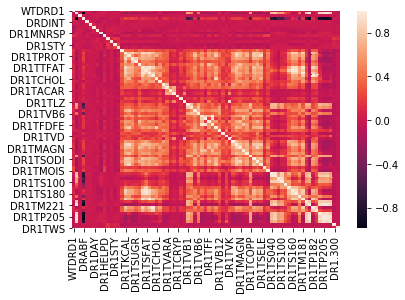

In [10]:
plot1 = plt.figure(1)
corr = normalized_df.corr()
heatmap = sns.heatmap(corr)
plt.savefig('heatmap.png', dpi=400)

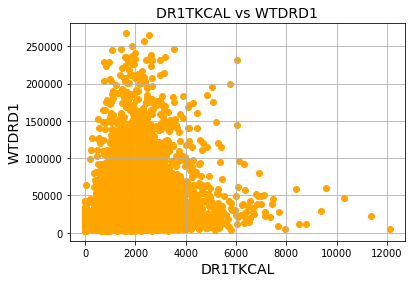

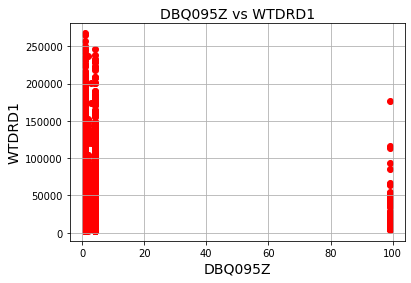

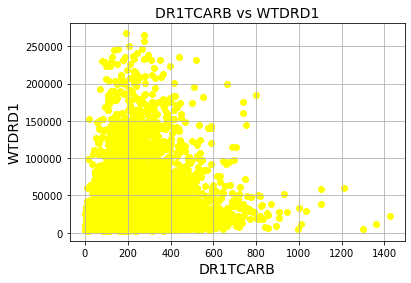

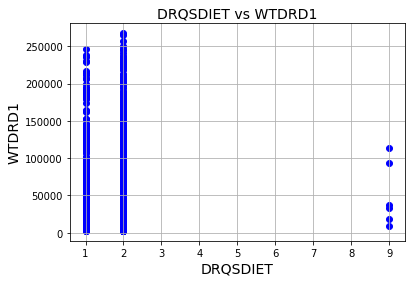

In [11]:
#Looking at the lINEAR realtionships between x and y
plot2 = plt.figure(2)
plt.scatter(dataset['DR1TKCAL'], dataset['WTDRD1'], color='orange')
plt.title('DR1TKCAL vs WTDRD1', fontsize=14)
plt.xlabel('DR1TKCAL', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot3 = plt.figure(3)
plt.scatter(dataset['DBQ095Z'], dataset['WTDRD1'], color='red')
plt.title('DBQ095Z vs WTDRD1', fontsize=14)
plt.xlabel('DBQ095Z', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot4 = plt.figure(4)
plt.scatter(dataset['DR1TCARB'], dataset['WTDRD1'], color='yellow')
plt.title('DR1TCARB vs WTDRD1', fontsize=14)
plt.xlabel('DR1TCARB', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot5 = plt.figure(5)
plt.scatter(dataset['DRQSDIET'], dataset['WTDRD1'], color='blue')
plt.title('DRQSDIET vs WTDRD1', fontsize=14)
plt.xlabel('DRQSDIET', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()


In [12]:
#Setting Independant and Dependant variables
X = normalized_df.drop(['WTDRD1'], axis=1)
y = np.ravel(normalized_df[['WTDRD1']])

In [13]:
#Splitting of Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6928, 76) (6928,)
(1733, 76) (1733,)


In [14]:
#Random Forrest Regression
model_rf = RandomForestRegressor(n_estimators=10, random_state=0)
model_rf.fit(X_train, y_train)
#model_rf.show(view='Tree', tree_id=0)

print("Random Forest Predictions:\n%s" % model_rf.predict(X_test))
#print("Random Forest Results:\n%s" % model_rf.evaluate(X_test))
print("Random Forest Score:\n%s" % model_rf.score(X_train, y_train))

Random Forest Predictions:
[0.08654547 0.02634605 0.10205027 ... 0.08471187 0.21750698 0.02582507]
Random Forest Score:
0.8601242170009731


In [15]:
#Making our Prediction using Linear Regression
#regr = linear_model.LinearRegression()
regr = linear_model.SGDRegressor(max_iter=1000, power_t = 0.5, eta0 = 1, tol = 1e-3)

In [16]:
#Fitting the model
model_lr = regr.fit(X_train, y_train)
#Predicting the test set results
predictions = regr.predict(X_test)
print('Linear Regression Predictions: \n', predictions)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Linear Regression Predictions: 
 [0.10178793 0.06199565 0.11699114 ... 0.10520315 0.15045742 0.05056917]
Intercept: 
 [0.0629242]
Coefficients: 
 [-0.00872742 -0.01778295  0.0583388   0.00138117  0.02347435 -0.08184232
 -0.10987287 -0.04682344  0.14666322 -0.01977564 -0.02680741 -0.00330166
  0.02858615  0.06272116  0.00123965  0.03872182 -0.07940066 -0.02763733
 -0.02720904 -0.00229195 -0.00296945 -0.02031646  0.00664263 -0.07371633
  0.02624472 -0.00366143  0.01556741  0.01666807  0.02992556 -0.01527284
 -0.00899677  0.01388203  0.01070523  0.03093468  0.03224977  0.01560164
  0.01058041  0.00974327  0.00277852  0.01029599 -0.02182619 -0.03040588
 -0.09443979 -0.04078857  0.02424906  0.00062235  0.04312673  0.07014072
 -0.06329731  0.00286273  0.00785435  0.01952092  0.04046154 -0.00656071
  0.23118029  0.20967315  0.08136296  0.02447361 -0.05680812  0.00519199
 -0.0527133   0.03897717 -0.04307762  0.0476544  -0.03480443 -0.03725674
  0.02416157 -0.00561299  0.00329122  0.02382399 -0

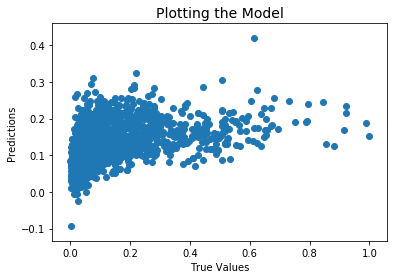

In [17]:
#Plotting the Linear Regression Model
plot2 = plt.figure(6)
plt.scatter(y_test, predictions)
plt.title('Plotting the Model', fontsize=14)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.savefig('Model_Plot.png', dpi=400)

In [18]:
#MSE
rms = np.sqrt(mean_squared_error(y_test, predictions))
print('MSE: \n', rms)

MSE: 
 0.13147481688563015


In [19]:
#R Squared Score of Linear Regression
r_squared = r2_score(y_test, predictions)
print("R Squared Score:\n%s" % r_squared)

R Squared Score:
0.16954338403837899


In [20]:
#Cross Validation
print("Cross_Val_Predictions:\n%s" % cross_val_predict(regr, X, y, cv=5))
print("Cross_Val_score:\n%s" % cross_val_score(regr, X, y, cv = 5))

Cross_Val_Predictions:
[0.11327058 0.07462439 0.10072876 ... 0.08530694 0.09537603 0.08451796]
Cross_Val_score:
[-133.64683067 -178.66117483  -40.96583936   -4.21992279   -2.91170788]
